### Mass Growth Rate: Troubleshooting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.lines import Line2D
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from itertools import groupby
from matplotlib.ticker import ScalarFormatter
%reload_ext autoreload
%autoreload 1
%aimport help_func

In [2]:
forest_table = pd.read_hdf('/data/a/cpac/aurora/reducedtrees0.h5', 'ft')
with open("/data/a/cpac/xinliu/reducedtrees/progenitor_idx0.txt") as f:
    progenitor_idx = [[int(p) for p in s.strip().split(" ")] if s.strip() != "" else [] for s in f]

In [3]:
n = 10
snap = 99 
snap2 = 98
snap3 = 97
mm_thresh1 = 1/10
mm_thresh2 = 0.3
norm = np.int(2.7*10**9)
xaxis = 'z_nums'
extremum = ''
my_range = [10**13, 10**14]
my_range_str = ["{:.2e}".format(my_range[0]), "{:.2e}".format(my_range[1])]
#bins = [10**9.5, 10**10.5, 10**11.5, 10**12.5, 10**13.5, 10**14.5]
small_bins = [10**11.5, 10**12.5, 10**13.5, 10**14.5]
large_bins = [10**9.5, 10**10.5, 10**11.5, 10**12.5, 10**13.5, 10**14.5]
rangel_bins = [1*10**11, 1.5*10**11, 2.3*10**11, 3.5*10**11, 5.3*10**11, 8.1*10**11, 1.2*10**12, 1.9*10**12, 2.8*10**12, 4.3*10**12, 6.6*10**12, 1*10**13]
rangel_bins2 = np.concatenate(([rangel_bins[0] - 0.25*10**11], [(rangel_bins[i] + rangel_bins[i+1]) / 2 for i in np.arange(len(rangel_bins) -1)], [rangel_bins[-1] + 3.4*10**13]), axis = 0)
norm_tf = True
avg_tf = True
# Convert snapshots to redshifts
redshifts = np.flip(np.array([10.044, 9.8065, 9.5789, 9.3608, 9.1515, 8.7573, 8.5714, 8.3925, 8.0541, 7.8938, 7.7391, 7.4454, 7.3058, 7.04, 6.9134, 6.6718, 6.5564, 6.3358, 6.1277, 6.028, 5.8367, 5.6556, 5.4839, 5.3208, 5.2422, 5.0909, 4.9467, 4.7429, 4.6145, 4.4918, 4.3743, 4.2618, 4.1015, 4.00, 3.8551, 3.763, 3.6313, 3.5475, 3.4273, 3.3133, 3.205, 3.102, 3.0361, 2.9412, 2.8506, 2.7361, 2.6545, 2.5765, 2.4775, 2.4068, 2.3168, 2.2524, 2.1703, 2.0923, 2.018, 1.9472, 1.8797, 1.7994, 1.7384, 1.68, 1.6104, 1.5443, 1.4938, 1.4334, 1.3759, 1.321, 1.2584, 1.2088, 1.152, 1.1069, 1.0552, 1.006, 0.9591, 0.9143, 0.8646, 0.824, 0.7788, 0.7358, 0.6948, 0.6557, 0.6184, 0.5777, 0.5391, 0.5022, 0.4714, 0.4337, 0.4017, 0.3636, 0.3347, 0.3035, 0.2705, 0.2423, 0.2123, 0.1837, 0.1538, 0.1279, 0.1008, 0.0749, 0.0502, 0.0245, 0.00]))

#### Run for just one bin (multiple halos)

In [31]:
# Find some halos in a range
range1 = [10**11, 10**13]
halo_idx = help_func.find_halos(forest_table, snap, mass_range = range1)

In [32]:
len(halo_idx)

34993

In [33]:
# Track their evolution
timesteps, masses, main_prog_list, maj_mergers = help_func.track_evol_multiple(halo_idx, redshifts, progenitor_idx, forest_table, x_axis = 'z_nums')

In [36]:
# Calculate the alphas
%prun alphas = help_func.calc_mass_growth_rate(timesteps, masses, main_prog_list, progenitor_idx, forest_table)

         701032 function calls (631021 primitive calls) in 1.333 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.460    0.153    0.546    0.182 core.py:1959(_flat_age)
        1    0.316    0.316    1.313    1.313 help_func.py:568(calc_mass_growth_rate)
        1    0.181    0.181    0.181    0.181 help_func.py:576(<listcomp>)
105003/34999    0.063    0.000    0.250    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
    70012    0.042    0.000    0.042    0.000 {built-in method numpy.array}
    34993    0.036    0.000    0.188    0.000 function_base.py:4616(append)
        6    0.032    0.005    0.047    0.008 scimath.py:183(sqrt)
       11    0.024    0.002    0.024    0.002 {function Quantity.__array_ufunc__ at 0x7f612d8ef430}
    34993    0.024    0.000    0.024    0.000 {built-in method numpy.zeros}
    34993    0.022    0.000    0.053    0.000 fromnumeric.py:1705(ravel)
    

In [14]:
len(alphas)

264

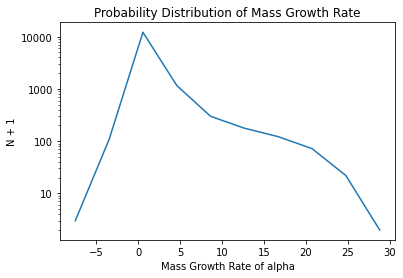

In [18]:
# Plot them
a = help_func.plot_distrib(alphas, "Mass Growth Rate", "alpha", zoom = False)

#### Attempt with Bins

In [21]:
# Find some halos and put them in bins
%time bin_halo_idx = help_func.bin_halos(forest_table, snap, large_bins)

CPU times: user 86 ms, sys: 10.3 ms, total: 96.3 ms
Wall time: 38.2 ms


In [22]:
# Track their evolution
%time timesteps, masses, main_prog_list, maj_mergers = help_func.track_evol_binned(bin_halo_idx, large_bins, redshifts, progenitor_idx, forest_table, x_axis = 'z_nums')

CPU times: user 2min 23s, sys: 3.15 s, total: 2min 27s
Wall time: 2min 23s


In [24]:
# Calculate the alphas
%time alphas = help_func.calc_BINNED_mass_growth_rate(timesteps, masses, main_prog_list, progenitor_idx, forest_table)


In Calc Mass_Growth_Rate

In Calc Mass_Growth_Rate


KeyboardInterrupt: 

In [ ]:
# Plot them
a = help_func.plot_distrib(alphas, "Mass Growth Rate", "alpha", nbins = 50, zoom = False)